# Descriptive Analytics and Data Preprocessing on Sales & Discounts Dataset

## Descriptive Analytics for Numerical Columns

In [290]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [292]:
sales = pd.read_csv('sales_data_with_discounts.csv')

In [294]:
sales.head()

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.50120
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102960,89323.89704
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910160,102042.08980
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.92530
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.05377


In [296]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               450 non-null    object 
 1   Day                450 non-null    object 
 2   SKU                450 non-null    object 
 3   City               450 non-null    object 
 4   Volume             450 non-null    int64  
 5   BU                 450 non-null    object 
 6   Brand              450 non-null    object 
 7   Model              450 non-null    object 
 8   Avg Price          450 non-null    int64  
 9   Total Sales Value  450 non-null    int64  
 10  Discount Rate (%)  450 non-null    float64
 11  Discount Amount    450 non-null    float64
 12  Net Sales Value    450 non-null    float64
dtypes: float64(3), int64(3), object(7)
memory usage: 45.8+ KB


## Calculate the mean, median, mode, and standard deviation

In [299]:
sales.describe()

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
count,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,5.066667,10453.433333,33812.835556,15.155242,3346.499424,30466.336131
std,4.231602,18079.904840,50535.074173,4.220602,4509.902963,46358.656624
min,1.000000,290.000000,400.000000,5.007822,69.177942,326.974801
25%,3.000000,465.000000,2700.000000,13.965063,460.459304,2202.208645
50%,4.000000,1450.000000,5700.000000,16.577766,988.933733,4677.788059
75%,6.000000,10100.000000,53200.000000,18.114718,5316.495426,47847.912855
max,31.000000,60100.000000,196400.000000,19.992407,25738.022190,179507.479000


#### Average Volume: 5 items sold per transaction.
#### Average Price: 10,453 per item.
#### Total Sales Value: Averages 33,813, with a wide range from 400 to 196,400.
#### Discount Rate: Average discount is 15.16%, varying between 5% and 20%.
#### Discount Amount: Average of 3,347, with large variations (from 69 to 25,738).
#### Net Sales Value: Averages 30,466 after discounts, ranging from 327 to 179,507.

## Data Visualization

## Histograms

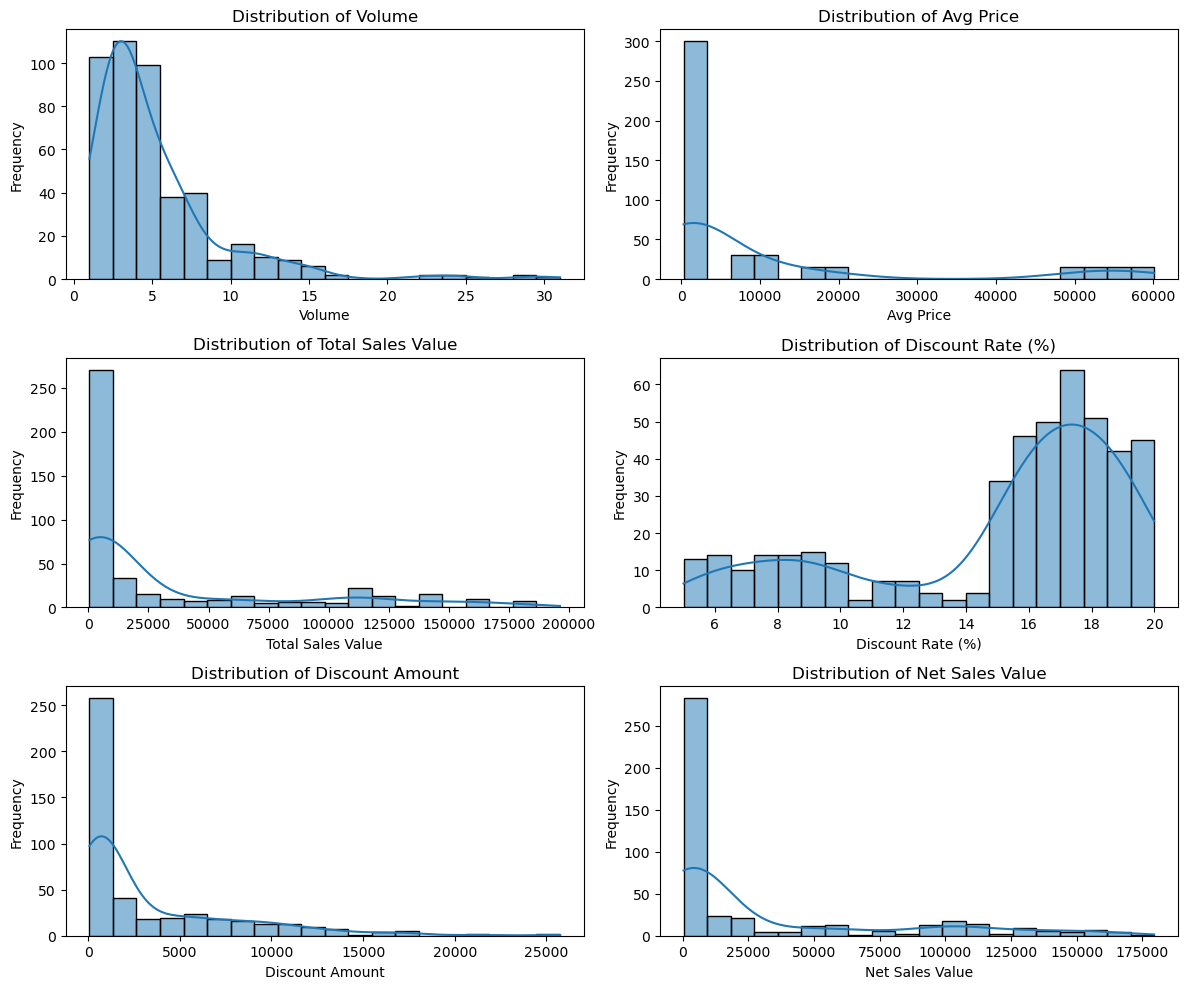

In [304]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assume 'data' is your DataFrame

# List of numerical columns
numerical_cols = ['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)', 'Discount Amount', 'Net Sales Value']

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Plot histograms for each numerical column
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 2, i)
    sns.histplot(sales[col], kde=True, bins=20)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


## Boxplots

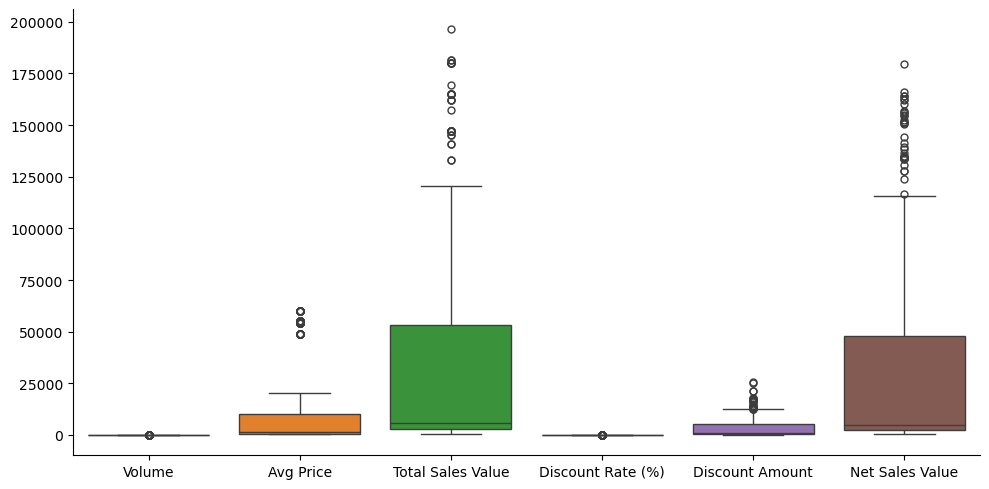

In [307]:
sns.catplot(sales, kind = 'box', height=5, aspect=2)
plt.show()

In [309]:
numeric_cols = sales[['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)', 'Discount Amount', 'Net Sales Value']]
outliers = {}

for col in numeric_cols:
    Q1 = sales[col].quantile(0.25)
    Q3 = sales[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    outliers[col] = sales[(sales[col] < lower_limit) | (sales[col] > upper_limit)].shape[0]


In [311]:
outliers

{'Volume': 44,
 'Avg Price': 60,
 'Total Sales Value': 36,
 'Discount Rate (%)': 45,
 'Discount Amount': 24,
 'Net Sales Value': 35}

#### Outliers represent around 5%–13% of the data, which is noticeable.
#### The Avg Price has 60 outliers, about 13.3% of the data.
#### The Discount Rate has 45 outliers, about 10% of the data.
#### These outliers could indicate rare transactions or potential data issues.

## Bar Chart Analysis for Categorical Column

Insights for City:
City
C    450
Name: count, dtype: int64
Insights for BU:
BU
Mobiles      150
FMCG         150
Lifestyle    150
Name: count, dtype: int64
Insights for Brand:
Brand
Jeera      90
Gear       60
Viva       60
RealU      45
YouM       45
Babaji     45
Vedic      45
Sumsang    30
Orange     30
Name: count, dtype: int64
Insights for Model:
Model
RU-10             15
RU-9 Plus         15
M-Formals         15
W-Lounge          15
W-Western         15
M-Casuals         15
M-Jeans           15
W-Inners          15
W-Casuals         15
M- Inners         15
M- T Shirts       15
Gear BB Cream     15
Gear Shampoo      15
Gear Cream        15
Gear Oil          15
Vedic Oil         15
Babaji Cream      15
Babaji Shampoo    15
Vedic Shampoo     15
Vedic Cream       15
Babaji Oil        15
O-11              15
O-10              15
S-21              15
S-20              15
RU-9              15
YM-98             15
YM-99 Plus        15
YM-99             15
M-Shoes           15
Name: coun

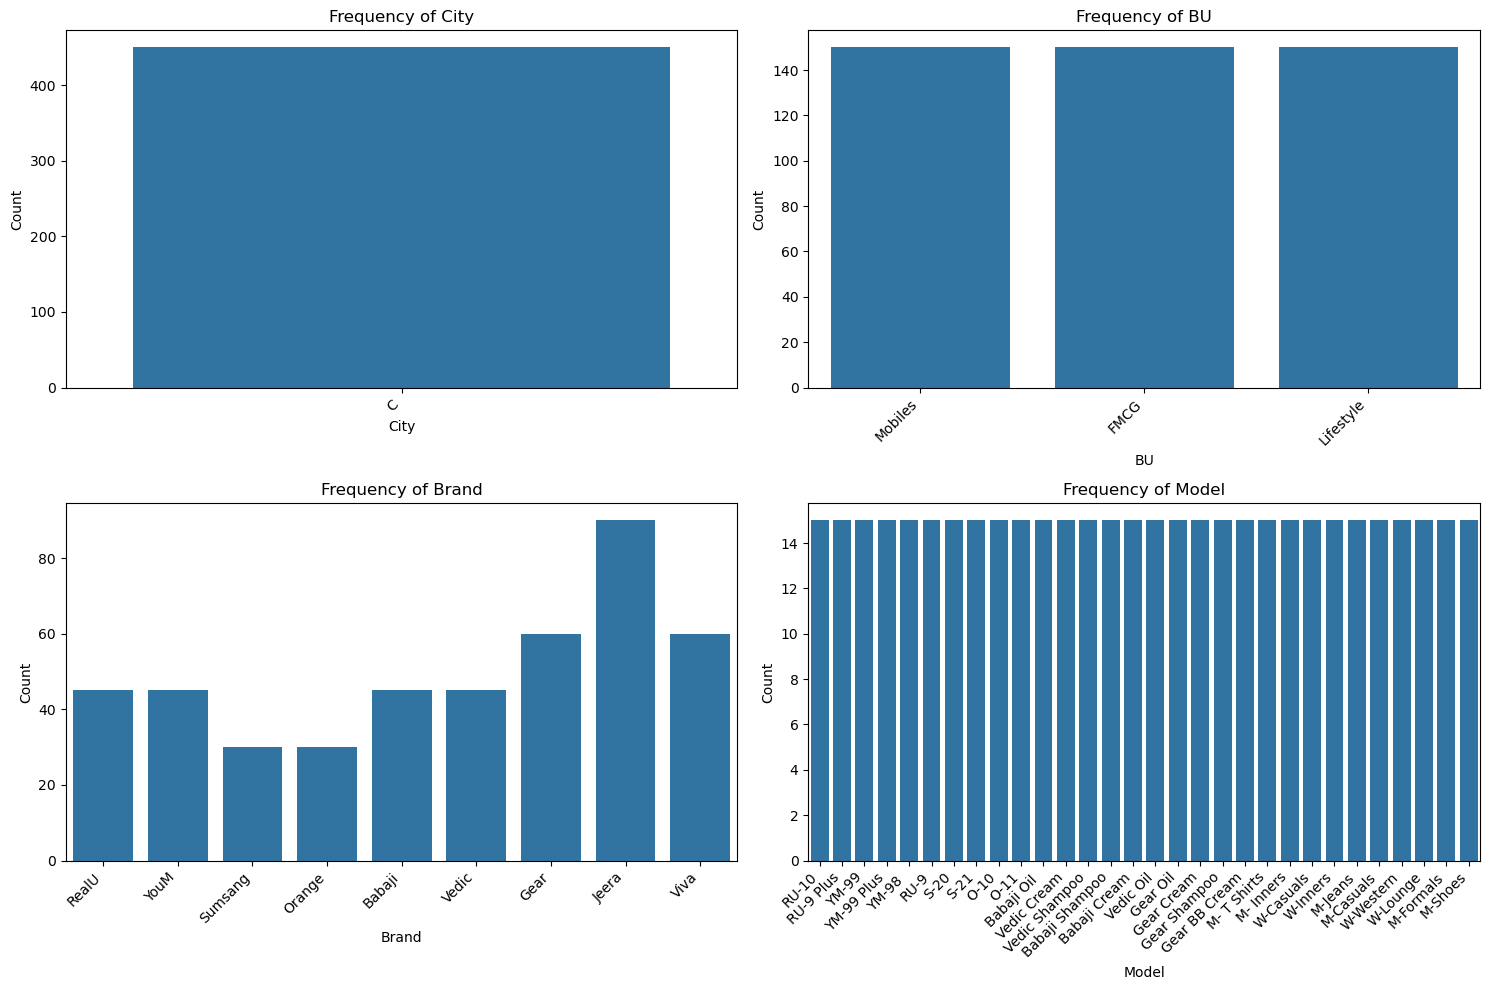

In [314]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of categorical columns (you can adjust this based on your dataset)
categorical_cols = ['City', 'BU', 'Brand', 'Model']

# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# Create bar charts for each categorical column
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 2, i)  # Adjust the subplot grid as needed
    sns.countplot(x=col, data=sales)  # Replace 'sales' with your dataframe name
    plt.title(f'Frequency of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    category_counts = sales[col].value_counts()
    print(f"Insights for {col}:")
    print(category_counts)

plt.tight_layout()
plt.show()


Insights for Day:
Day
Thursday     90
Friday       60
Saturday     60
Sunday       60
Monday       60
Tuesday      60
Wednesday    60
Name: count, dtype: int64
----------------------------------------
Insights for Date:
Date
01-04-2021    30
02-04-2021    30
03-04-2021    30
04-04-2021    30
05-04-2021    30
06-04-2021    30
07-04-2021    30
08-04-2021    30
09-04-2021    30
10-04-2021    30
11-04-2021    30
12-04-2021    30
13-04-2021    30
14-04-2021    30
15-04-2021    30
Name: count, dtype: int64
----------------------------------------
Insights for SKU:
SKU
M01    15
M02    15
L09    15
L08    15
L07    15
L06    15
L05    15
L04    15
L03    15
L02    15
L01    15
F10    15
F09    15
F08    15
F07    15
F06    15
F05    15
F04    15
F03    15
F02    15
F01    15
M10    15
M09    15
M08    15
M07    15
M06    15
M05    15
M04    15
M03    15
L10    15
Name: count, dtype: int64
----------------------------------------


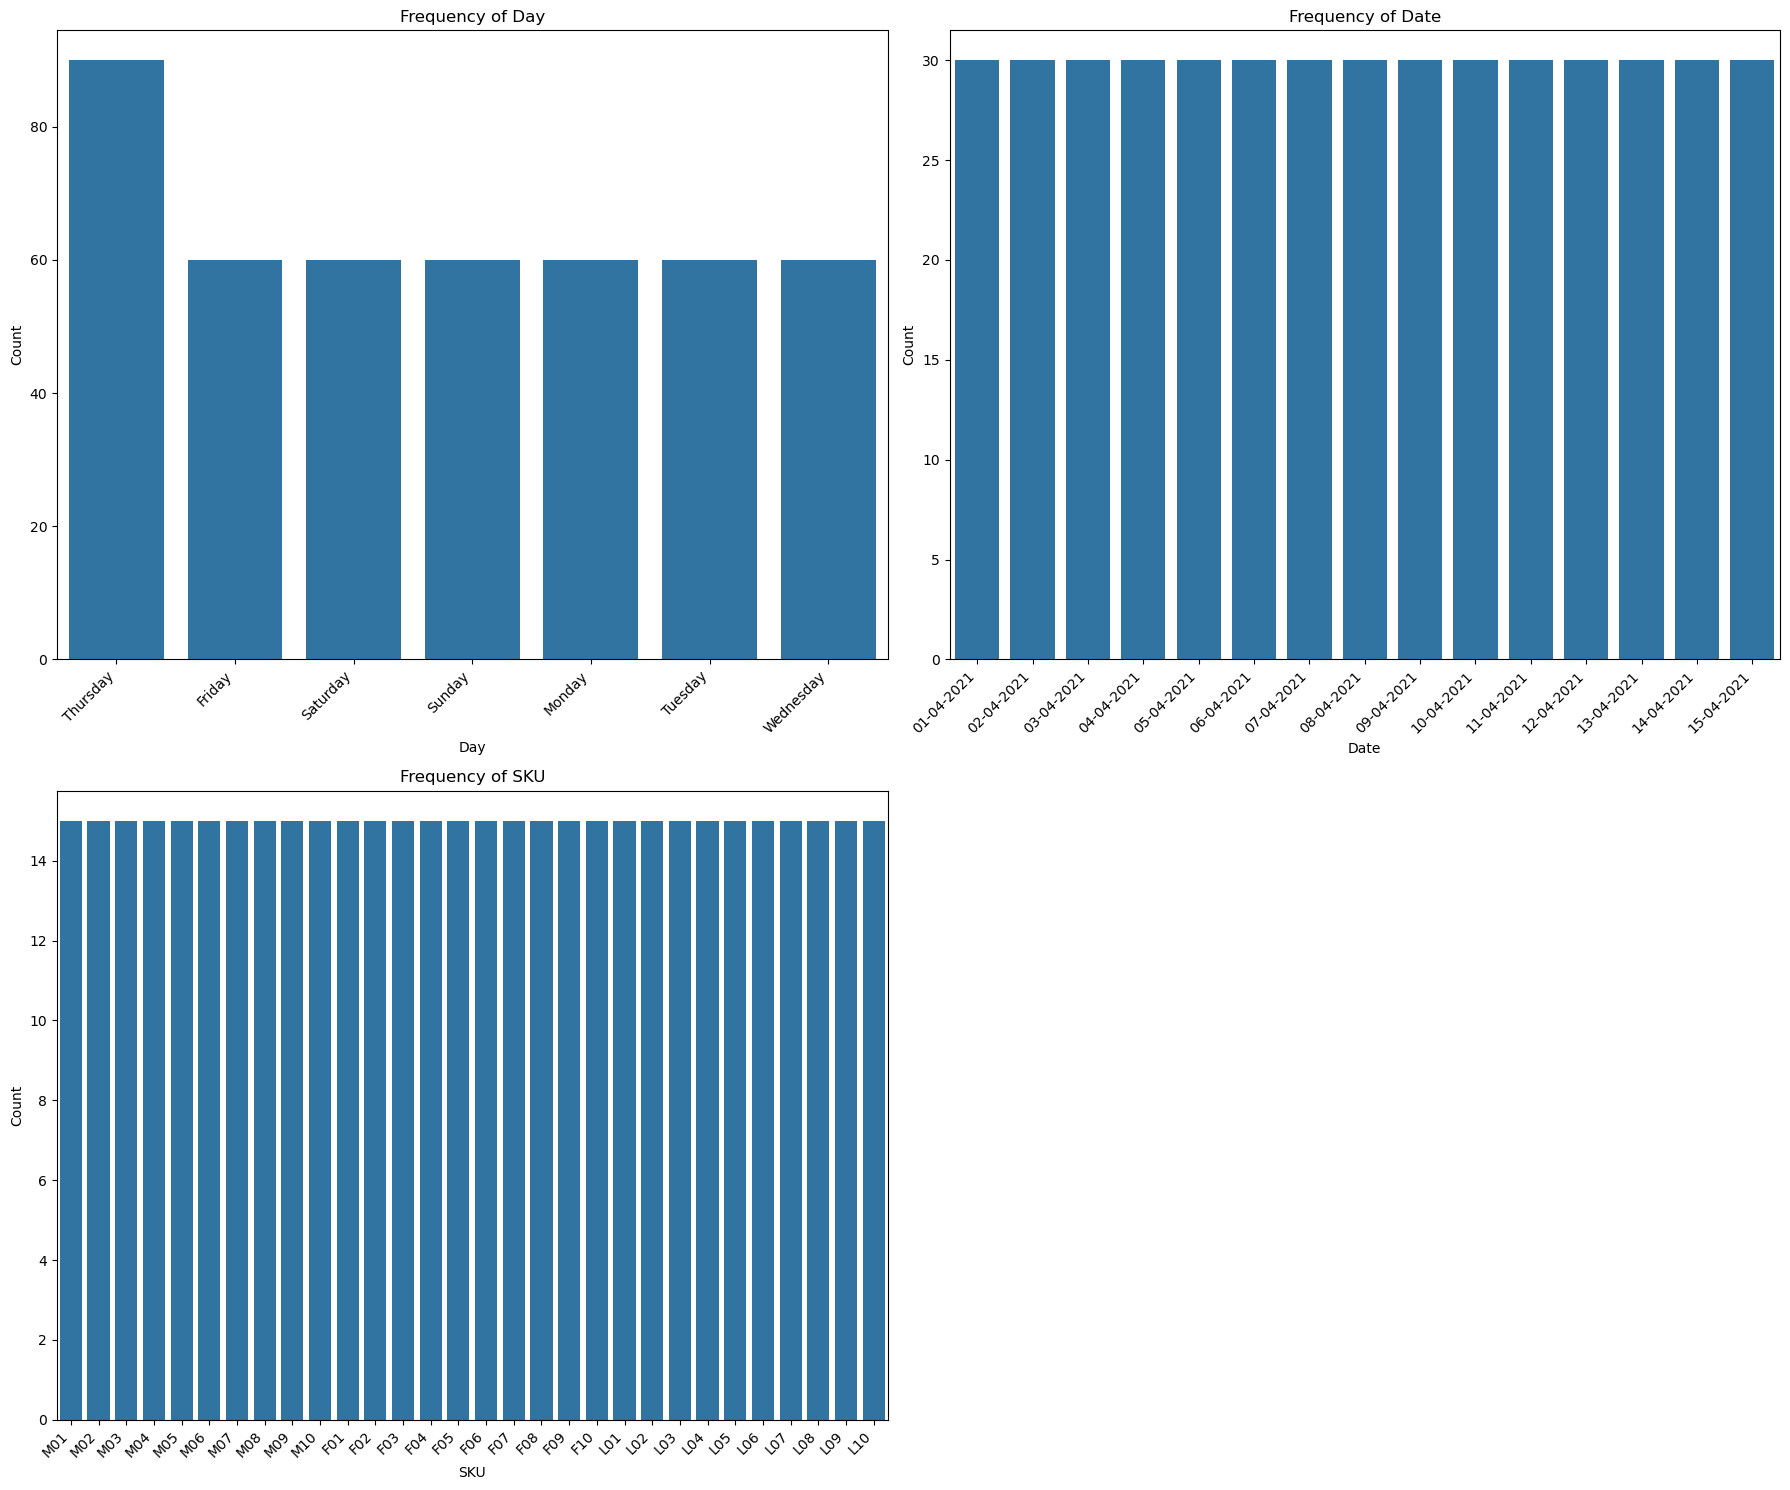

In [316]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of categorical columns to analyze
categorical_cols = ['Day', 'Date', 'SKU']

# Set up the matplotlib figure
plt.figure(figsize=(18, 15))

# Create bar charts for each categorical column
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 2, i)  # Adjusting the number of rows and columns
    sns.countplot(x=col, data=sales)  # Replace 'sales' with your dataframe name
    plt.title(f'Frequency of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    category_counts = sales[col].value_counts()
    print(f"Insights for {col}:")
    print(category_counts)
    print("-" * 40)

plt.tight_layout()
plt.show()


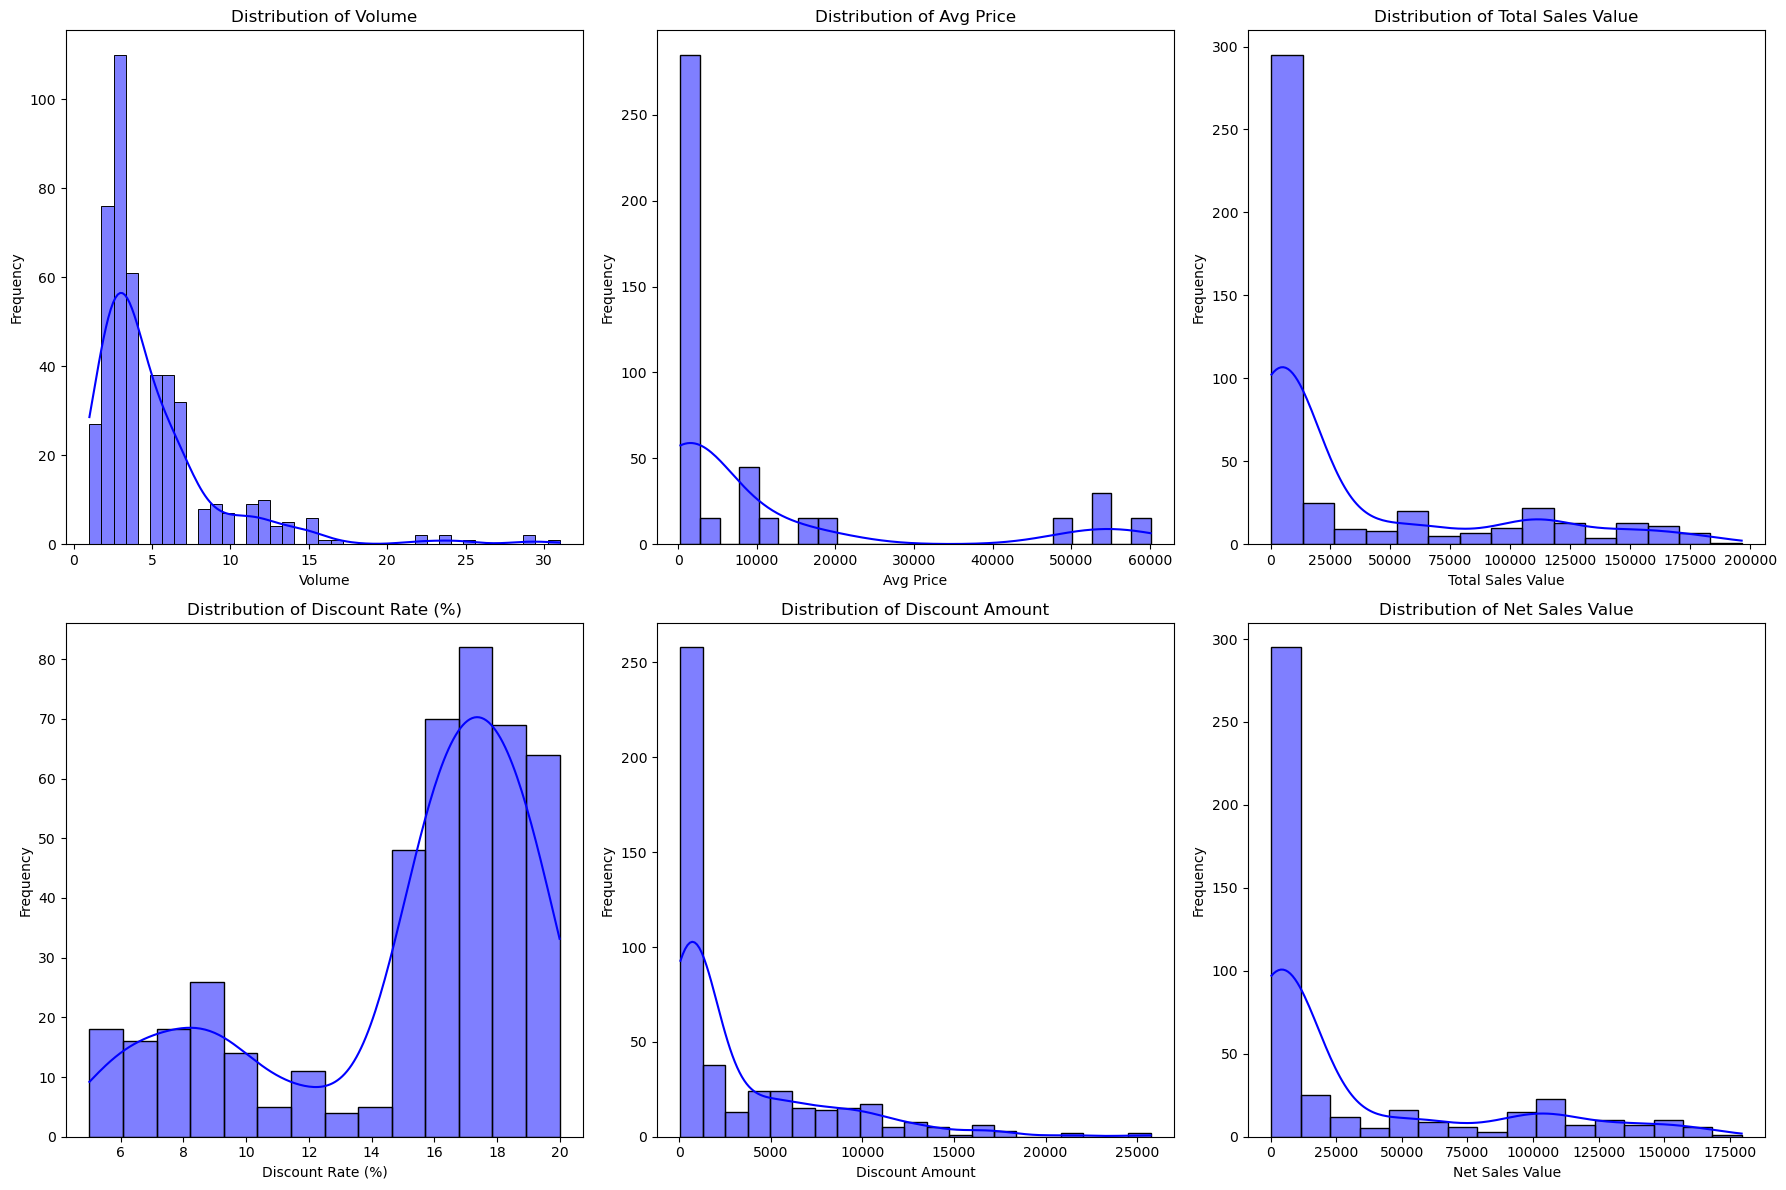

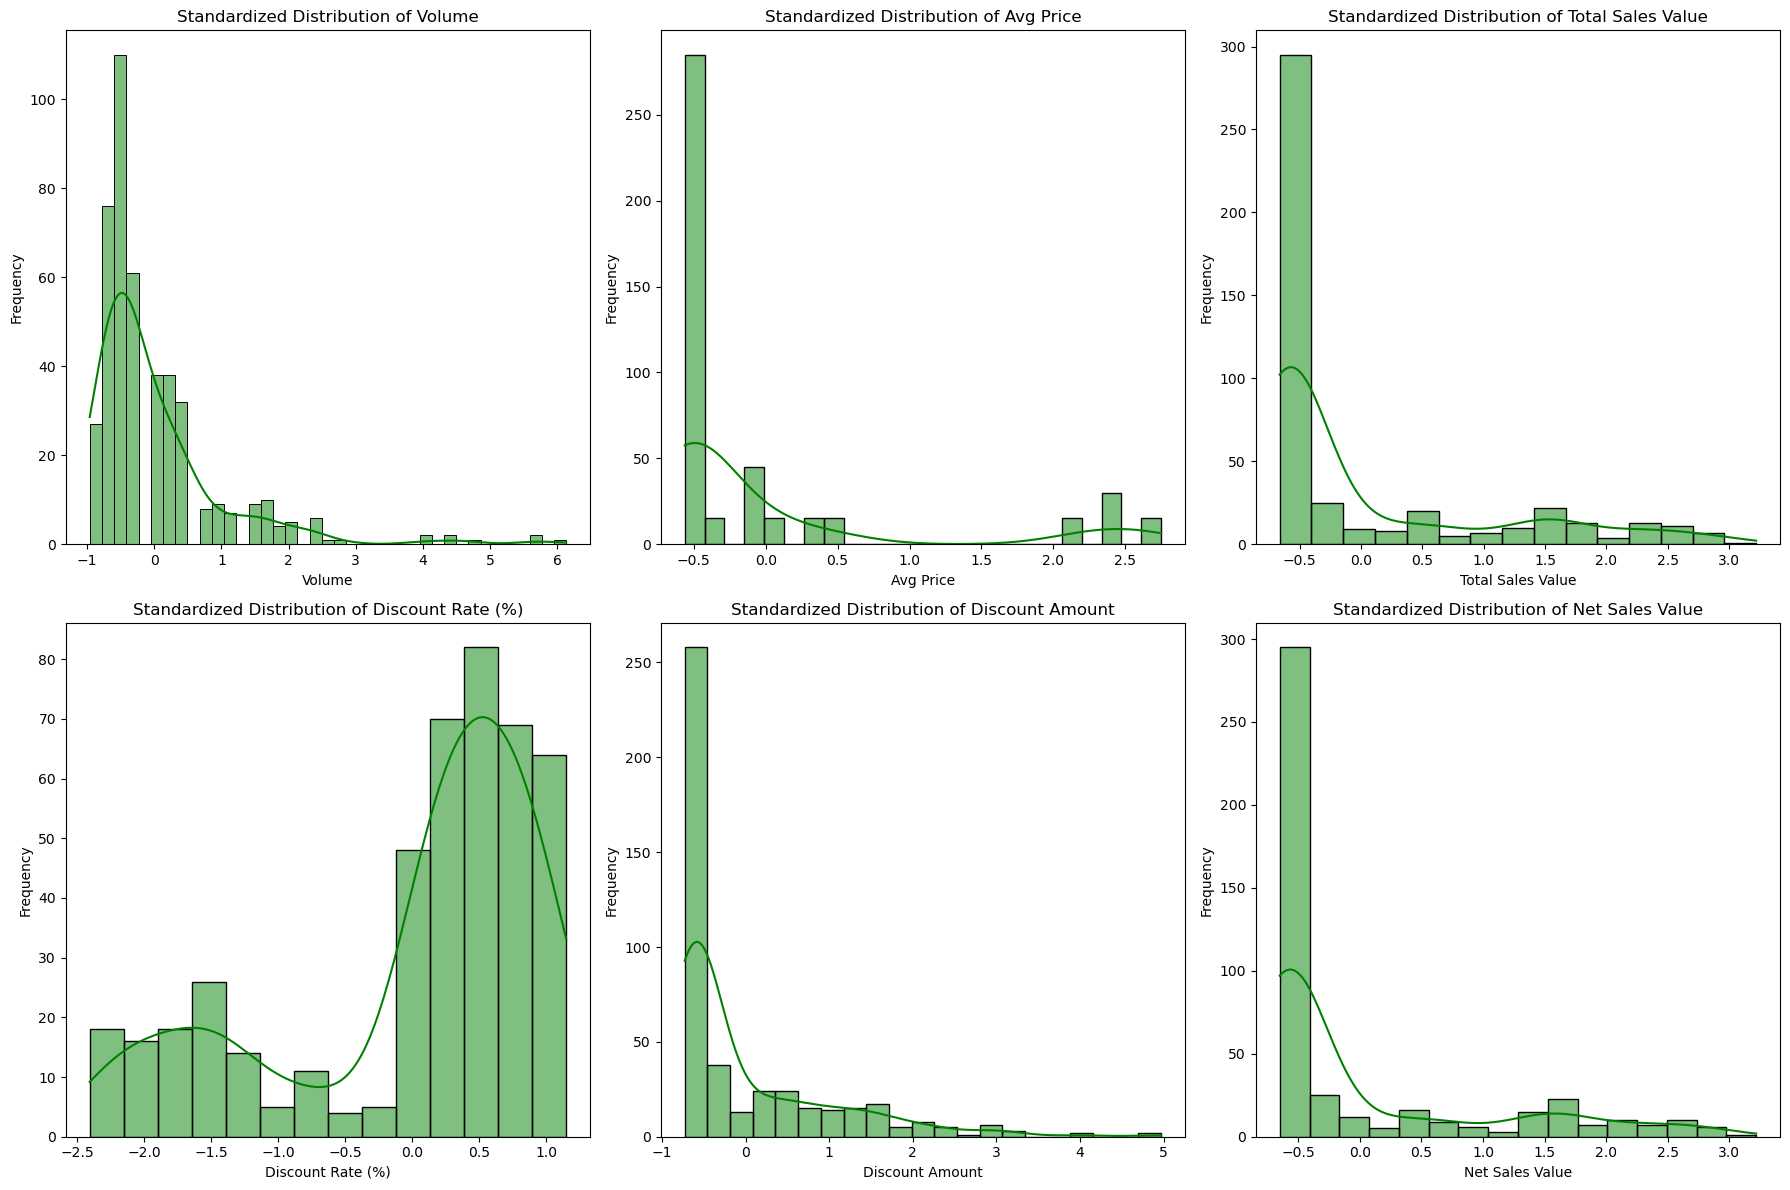

In [253]:
category_counts = sales[col].value_counts()
    print(f"Insights for {col}:")
    print(category_counts)
    print("-" * 40)

## Conversion of Categorical Data into Dummy Variables

In [255]:
sales.columns

Index(['Date', 'Day', 'SKU', 'City', 'Volume', 'BU', 'Brand', 'Model',
       'Avg Price', 'Total Sales Value', 'Discount Rate (%)',
       'Discount Amount', 'Net Sales Value'],
      dtype='object')

In [256]:
# Apply one-hot encoding
sales_encoded = pd.get_dummies(sales, columns=["SKU"], drop_first=False)

# Convert True/False to 1/0 for all columns
sales_encoded = sales_encoded

# Display a portion of the transformed dataset
print(sales_encoded.head())


         Date       Day City    Volume       BU  Brand       Model  Avg Price  \
0  01-04-2021  Thursday    C  2.350029  Mobiles  RealU       RU-10   0.091173   
1  01-04-2021  Thursday    C  1.167129  Mobiles  RealU   RU-9 Plus  -0.019570   
2  01-04-2021  Thursday    C  0.457388  Mobiles   YouM       YM-99   0.312659   
3  01-04-2021  Thursday    C  0.220808  Mobiles   YouM  YM-99 Plus   0.534146   
4  01-04-2021  Thursday    C -0.488932  Mobiles   YouM      YM-98   -0.130313   

   Total Sales Value  Discount Rate (%)  ...  SKU_M01  SKU_M02  SKU_M03  \
0           2.925721          -0.830289  ...     True    False    False   
1           1.330995          -0.852661  ...    False     True    False   
2           1.562775          -1.351631  ...    False    False     True   
3           1.719276          -1.949723  ...    False    False    False   
4          -0.188452           0.673739  ...    False    False    False   

   SKU_M04  SKU_M05  SKU_M06  SKU_M07  SKU_M08  SKU_M09  SKU_M

In [260]:
import pandas as pd

# Sample dataset (replace with your actual data)
# Assuming 'sales' is your dataframe
categorical_columns = ['Day', 'SKU', 'City']  # Columns that need to be one-hot encoded

# Apply one-hot encoding for categorical columns only
sales_encoded = pd.get_dummies(sales, columns=categorical_columns, drop_first=False)

# Convert only numerical columns to integers where applicable
# Identify numerical columns (you can adjust based on your dataset's actual columns)
numerical_columns = sales_encoded.select_dtypes(include=['float64', 'int64']).columns

# Convert numerical columns to integers (except for columns like Date)
sales_encoded[numerical_columns] = sales_encoded[numerical_columns].astype(int)

# Display a portion of the transformed dataset
print(sales_encoded.head())


         Date  Volume       BU  Brand       Model  Avg Price  \
0  01-04-2021       2  Mobiles  RealU       RU-10          0   
1  01-04-2021       1  Mobiles  RealU   RU-9 Plus          0   
2  01-04-2021       0  Mobiles   YouM       YM-99          0   
3  01-04-2021       0  Mobiles   YouM  YM-99 Plus          0   
4  01-04-2021       0  Mobiles   YouM      YM-98           0   

   Total Sales Value  Discount Rate (%)  Discount Amount  Net Sales Value  \
0                  2                  0                3                2   
1                  1                  0                1                1   
2                  1                 -1                1                1   
3                  1                 -1                1                1   
4                  0                  0                0                0   

   ...  SKU_M02  SKU_M03  SKU_M04  SKU_M05  SKU_M06  SKU_M07  SKU_M08  \
0  ...    False    False    False    False    False    False    False   
1  ...

In [262]:
sales_encoded.columns

Index(['Date', 'Volume', 'BU', 'Brand', 'Model', 'Avg Price',
       'Total Sales Value', 'Discount Rate (%)', 'Discount Amount',
       'Net Sales Value', 'Day_Friday', 'Day_Monday', 'Day_Saturday',
       'Day_Sunday', 'Day_Thursday', 'Day_Tuesday', 'Day_Wednesday', 'SKU_F01',
       'SKU_F02', 'SKU_F03', 'SKU_F04', 'SKU_F05', 'SKU_F06', 'SKU_F07',
       'SKU_F08', 'SKU_F09', 'SKU_F10', 'SKU_L01', 'SKU_L02', 'SKU_L03',
       'SKU_L04', 'SKU_L05', 'SKU_L06', 'SKU_L07', 'SKU_L08', 'SKU_L09',
       'SKU_L10', 'SKU_M01', 'SKU_M02', 'SKU_M03', 'SKU_M04', 'SKU_M05',
       'SKU_M06', 'SKU_M07', 'SKU_M08', 'SKU_M09', 'SKU_M10', 'City_C'],
      dtype='object')

In [264]:
sales['Model'].unique()

array(['RU-10', 'RU-9 Plus', 'YM-99', 'YM-99 Plus', 'YM-98 ', 'RU-9',
       'S-20', 'S-21', 'O-10', 'O-11', 'Babaji Oil ', 'Vedic Cream',
       'Vedic Shampoo', 'Babaji Shampoo', 'Babaji Cream', 'Vedic Oil',
       'Gear Oil', 'Gear Cream', 'Gear Shampoo', 'Gear BB Cream',
       'M- T Shirts', 'M- Inners', 'W-Casuals', 'W-Inners', 'M-Jeans',
       'M-Casuals', 'W-Western', 'W-Lounge', 'M-Formals', 'M-Shoes'],
      dtype=object)